# MODELO PREDICTIVO PARA LAS VENTAS GENERADAS EN WALMART PARA CADA HORA DE TRABAJO

## Importar Librerias

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse

In [162]:
import psycopg2

## Credenciales de la BD

In [5]:
user = 'kzvwgmey'
dbname = 'kzvwgmey'
host = 'batyr.db.elephantsql.com'
password = 'Fch8wl_TUVAul6pV-1z4Z-fXyKwEBPRs'

myConnection = psycopg2.connect(host = host, user = user, password = password, dbname = dbname)


## Funcion para ejecutar Querys Select

In [11]:
def SelectAllQuery(query):
    cur = myConnection.cursor()
    try:
        cur.execute(query)
        data = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
    except Exception as e:
        myConnection.commit()
        print('Error en el query:', e)
    else:
        cur.close()
        myConnection.commit()
        
        return(data,colnames) 

## Query a utilizar

In [157]:
queryVentas = f'''
  SELECT  SUM((unidades*precio)) AS "venta", anio, mes, semana, dia,hora FROM "Hechos_Ventas"
  INNER JOIN "Dimension_Tiempo_Ventas" USING (id_dtiempo)
  INNER JOIN "Dimension_Producto" USING (id_dproducto)
  GROUP BY anio, mes,semana, dia, hora
  HAVING SUM((unidades*precio)) > 0 
  ORDER BY anio, mes, semana, dia, hora;
  '''
hechosVentas = SelectAllQuery(queryVentas)
dfHechosVentas = pd.DataFrame(hechosVentas[0], columns = hechosVentas[1])

## Dividir DataFrame

In [49]:
X = dfHechosVentas['hora'].values.reshape(-1,1) 
y = dfHechosVentas['venta'].values

## Setear data de testeo y data de entrenamiento

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

## Crear la regresion

In [160]:
regresor = LinearRegression()
regresor.fit(X_train, y_train)

LinearRegression()

## Entrenar la regresion y generar predicciones

In [165]:
y_fit = regresor.predict(X_train) 
y_pred = regresor.predict(X_test)

## Grafico de la regresion

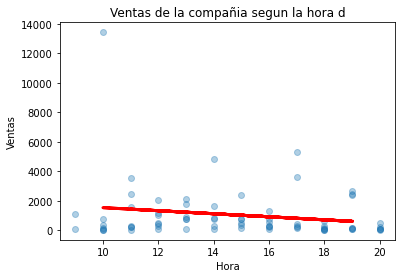

In [161]:
plt.scatter(X, y, alpha=0.35)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Ventas de la compañia segun la hora d')
plt.xlabel('Hora')
plt.ylabel('Ventas')
plt.show()

### FUNCION PARA PROBAR LA PREDICCION

In [141]:
def prediccion(numero):
    if numero < 9 or numero > 20:
        return ('A esta hora no se trabaja, se venden $0')
    return f'A la hora militar {numero} se predice que se venderan ${"{0:.2f}".format(y_pred[numero-9])}'

#### CORRA EL SIGUIENTE CODIGO PARA PROBAR EL FUNCIONAMIENTO DE LA REGRESION LINEAL

In [164]:
num = input('Ingrese una hora entre las 9 y las 20 para predecir cuanto dinero se vendera en la tienda a esa hora:\n')
print(prediccion(int(num))) if num.isdigit() else print('Tiene que ser un numero entero entre el 9 y el 20, intente de nuevo')

Ingrese una hora entre las 9 y las 20 para predecir cuanto dinero se vendera en la tienda a esa hora:
 9


A la hora militar 9 se predice que se venderan $1321.24
